In [1]:
from scipy.stats import norm

In [200]:
mean = -0.6
variance = 1

In [201]:
data_normal = norm.rvs(size=10000,loc=mean,scale=variance)

In [202]:
import pandas as pd
import numpy as np

In [203]:
from plotnine import ggplot, aes, labs, aes, geom_histogram, theme_minimal, scale_fill_manual, scale_x_continuous, geom_vline

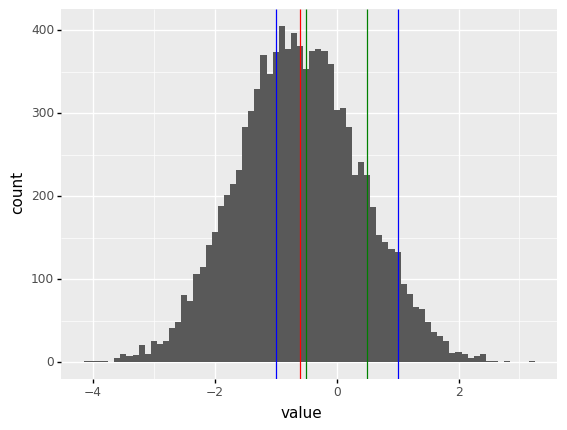

<ggplot: (8744233423999)>

In [204]:
(
    ggplot(data=pd.DataFrame({"value": data_normal}))
    + geom_histogram(aes(x="value"), binwidth=0.1, position="dodge")
    + geom_vline(xintercept=mean, color="red")
    + geom_vline(xintercept=-1, color="blue")
    + geom_vline(xintercept=1, color="blue")
    + geom_vline(xintercept=-0.5, color="green")
    + geom_vline(xintercept=0.5, color="green")
)

In [170]:
[np.round(i, 2) for i in norm.cdf([-0.5, 0.5, mean], loc=mean, scale=variance)]

[0.0, 0.0, 0.5]

In [171]:
data_normal

array([0.94270658, 0.96022861, 0.93188052, ..., 0.94125068, 0.95952355,
       0.95304119])

In [172]:
def cdf_allocate(cdf_values):
    assert len(cdf_values) == 3
    left_wing = cdf_values[0]
    middle_wing = cdf_values[1] - left_wing
    right_wing = 1 - (middle_wing + left_wing)
    assert left_wing + middle_wing + right_wing == 1
    return {"left_wing": left_wing, "middle_wing": middle_wing, "right_wing": right_wing}

In [285]:
mean = -0.75
variance = 0.3

In [286]:
cdf_allocate(norm.cdf([-0.5, 0.5, mean], loc=mean, scale=variance))

{'left_wing': 0.7976716190363569,
 'middle_wing': 0.20231292666676082,
 'right_wing': 1.545429688232236e-05}

In [287]:
left_poll = [{"mean": -0.6, "variance": 0.3, "prop": 0.5}, {"mean": -0.75, "variance": 0.3, "prop": 0.5}]

In [288]:
middle_poll = [{"mean": 0, "variance": 0.6, "prop": 0.7}, {"mean": 0.1, "variance": 0.4, "prop": 0.3}]

In [289]:
right_poll = [{"mean": 0.75, "variance": 0.2, "prop": 0.65}, {"mean": 0.6, "variance": 0.4, "prop": 0.35}]

In [299]:
def compute_vote(token_prop):
    return np.sqrt(token_prop * 100)

In [309]:
total = []
for poll in [left_poll, middle_poll, right_poll]:
    for p in poll:
        res = cdf_allocate(norm.cdf([-0.5, 0.5, p.get("mean")], loc=p.get("mean"), scale=p.get("variance")))
        res["prop"] = p.get("prop")
        left = compute_vote(res.get("left_wing")) * res.get("prop") * 100
        middle = compute_vote(res.get("middle_wing")) * res.get("prop") * 100
        right = compute_vote(res.get("right_wing")) * res.get("prop") * 100
        res["left"] = left
        res["middle"] = middle
        res["right"] = right
        total.append(res)

In [311]:
total

[{'left_wing': 0.6305586598182363,
  'middle_wing': 0.3693184737917985,
  'right_wing': 0.00012286638996517052,
  'prop': 0.5,
  'left': 397.03861897120174,
  'middle': 303.85789186386063,
  'right': 5.542255632077307},
 {'left_wing': 0.7976716190363569,
  'middle_wing': 0.20231292666676082,
  'right_wing': 1.545429688232236e-05,
  'prop': 0.5,
  'left': 446.5623190094404,
  'middle': 224.89604635628928,
  'right': 1.9655976751564879},
 {'left_wing': 0.20232838096364308,
  'middle_wing': 0.5953432380727137,
  'right_wing': 0.20232838096364314,
  'prop': 0.7,
  'left': 314.8664902338531,
  'middle': 540.1094210024759,
  'right': 314.86649023385314},
 {'left_wing': 0.06680720126885809,
  'middle_wing': 0.7745375447996848,
  'right_wing': 0.15865525393145707,
  'prop': 0.3,
  'left': 77.54126716914826,
  'middle': 264.0234440953523,
  'right': 119.49465617269728},
 {'left_wing': 2.0522634252189396e-10,
  'middle_wing': 0.10564977346162902,
  'right_wing': 0.8943502263331446,
  'prop': 0.6

In [314]:
left = sum([x.get("left") for x in total]) 
right = sum([x.get("right") for x in total]) 
middle = sum([x.get("middle") for x in total])

In [315]:
left, middle, right

(1255.1235297684366, 1765.0539792426282, 1327.3910008305088)